In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [43]:
ms = pd.read_csv(r'C:\Users\ckraft\Desktop\My Experiments\Personal Use\MSFT.csv')
ms.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-15,215.169998,215.419998,212.240005,214.130005,212.350037,27000600
1,2020-12-16,214.750000,220.110001,214.720001,219.279999,217.457199,35023300
2,2020-12-17,219.869995,220.889999,217.919998,219.419998,217.596054,32515800
3,2020-12-18,218.589996,219.690002,216.020004,218.589996,216.772934,63354900
4,2020-12-21,217.550003,224.000000,217.279999,222.589996,220.739685,37181900
5,2020-12-22,222.690002,225.630005,221.850006,223.940002,222.078476,22612200
6,2020-12-23,223.110001,223.559998,220.800003,221.020004,219.182739,18699600
7,2020-12-24,221.419998,223.610001,221.199997,222.750000,220.898376,10550600
8,2020-12-28,224.449997,226.029999,223.020004,224.960007,223.089996,17933500
9,2020-12-29,226.309998,227.179993,223.580002,224.149994,222.286713,17403200


In [44]:
#dist of log return

#calculating the log daily return
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

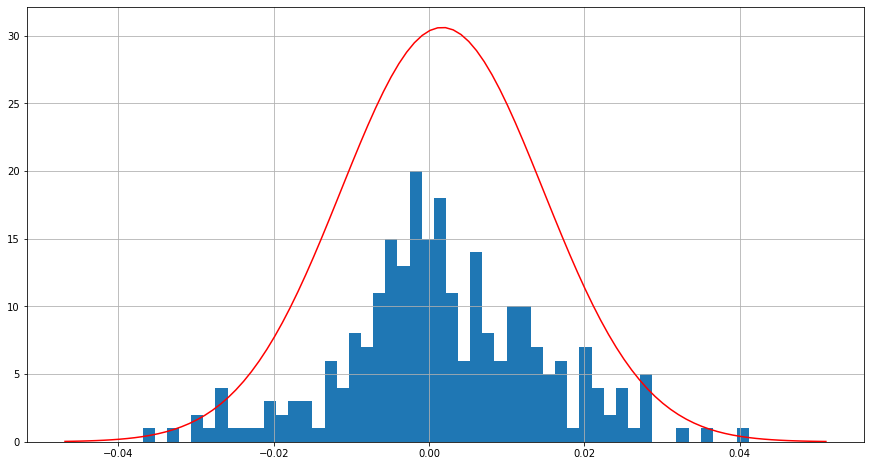

In [45]:
#Plotting a histogram to show the distribution of log retur
from scipy.stats import norm
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min()-0.01, ms['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

ms['LogReturn'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [46]:
#Pobability that the stock price will drop over 5% in a day
prob_return1 = norm.cdf(-0.05, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  3.648240921862719e-05


In [47]:
#Probability that the stock price of microsoft will drop over 10% in a day
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The Probability is ', prob_return1)

The Probability is  3.042815127521914e-15


In [48]:
#Probability of drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  3.07860344827226e-05


In [49]:
#Calculate value at risk (VaR)

VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.019738013338214382


In [50]:
#Quatile 
# 5% quant
print('5% quantile ', norm.ppf(0.05, mu, sigma))
#95% quant
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.019738013338214382
95% quantile  0.02314411942678371


In [51]:
#-----Confidence Interval

In [52]:
#log return for average stock return of Microsoft
ms['logReturn'] = np.log(ms['Close'].shift(-1)) - np.log(ms['Close'])

In [53]:
#Let's build 90% confidence interval for log return
sample_size = ms['logReturn'].shape[0]
sample_mean = ms['logReturn'].mean()
sample_std = ms['logReturn'].std(ddof=1) / sample_size**0.5

#left and right quantile
z_left = norm.ppf(0.025)
z_right = norm.ppf(0.975) #0.975 = 0.95 + 0.025.

#upper and lower bound
interval_left = sample_mean+z_left*sample_std
interval_right = sample_mean-z_right*sample_std

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (9.364211863126964e-05, 9.364211863126986e-05)


In [54]:
#90% confidence interval tells you that 
#there will be 90% chance that the average stock return
#lies between "interval_left" and "interval_right".

print('90% confidence interval is ', (interval_left, interval_right))

90% confidence interval is  (9.364211863126964e-05, 9.364211863126986e-05)
